<a href="https://colab.research.google.com/github/PabloParadaSouto/Automatica/blob/master/RA_Q_learning_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt update
!apt install xvfb
!pip install pyvirtualdisplay
!pip install gym[toy_text]

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,346 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,796 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/u

Vamos a tratar de entender primero como funciona el juego del Taxi, para ello en un primer momento tendrás que mover tu el taxi para coger el pasagero y llevarlo a destino.

Este problema consiste en mover un taxi en un tablero para que, partiendo de una casilla, recoja a un cliente y lo deje en la casilla destino. Tanto el cliente como el destino pueden encontrarse solamente en una de las cuatro casillas preestablecidas. Además el tablero cuenta con paredes internas que impiden al taxi moverse en ciertas direcciones.

El estado está representado por la posición del taxi y los índices de las posiciones del cliente y el destino

La acción a realizar puede ser una de las siguientes: norte, sur, este, oeste, recoger cliente y dejar cliente. El estado objetivo consiste en dejar al cliente en su destino después de haberlo recogido. La recompensa que se le otorga al agente por realizar una acción está determinada por una tabla, la cual es creada al principio del entrenamiento

Hay 4 ubicaciones (etiquetadas con colores diferentes),

0: move south;
1: move north;
2: move east;
3: move west;
4: pickup the passenger;
5: dropoff the passenger.

Hay que soltar a pasajero en el edificio, que va a coincidir con una de las 4 posiciones posibles.



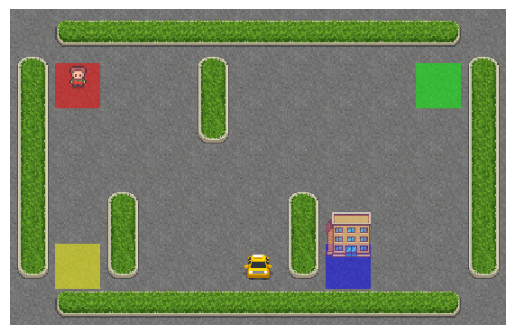

la accion ejecutada es  0
teclea acción y pulsa para seguir 


ValueError: invalid literal for int() with base 10: ''

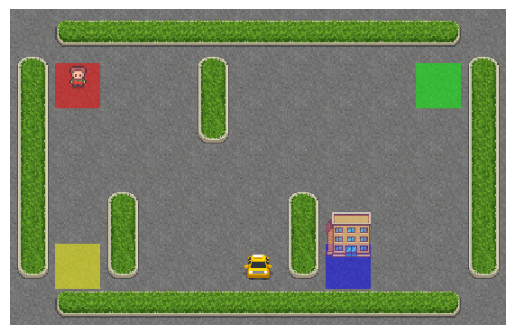

In [2]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import time

d = Display()
d.start()

env=gym.make("Taxi-v3")

# create a new instance of taxi, and get the initial state
state = env.reset()
#env.render(mode='human')



input ("pulsa para empezar .... ")

acc=0

#print ("seguimos ...")
#acc=(int)(input ("da una accion: "))
#print ("listo !!!!")

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())

#env.render()



is_done=False
t=0

while not is_done:
  estado,refuerzo,is_done,_=env.step(acc)
  print ("refuerzo ",refuerzo)
  print ("estado ",estado)
  t=t+1

  display.clear_output(wait=True)
  img.set_data(env.render('rgb_array'))
  plt.axis('off')
  display.display(plt.gcf())

  print ("la accion ejecutada es ",acc)
  acc=(int)(input ("teclea acción y pulsa para seguir "))



Este problema consiste en mover un taxi en un tablero para que, partiendo de una casilla, recoja a un cliente y lo deje en la casilla destino. Tanto el
cliente como el destino pueden encontrarse solamente en una de las cuatro
casillas preestablecidas. Además el tablero cuenta con paredes internas que
impiden al taxi moverse en ciertas direcciones.

El estado está representado por la posición del taxi y los índices de las posiciones del cliente y el destino


La acción a realizar puede ser una de las siguientes: norte, sur, este, oeste,
recoger cliente y dejar cliente. El estado objetivo consiste en dejar al cliente
en su destino después de haberlo recogido. La recompensa que se le otorga
al agente por realizar una acción está determinada por una tabla, la cual es
creada al principio del entrenamiento

Hay 4 ubicaciones (etiquetadas con colores diferentes),

    0: move south;
    1: move north;
    2: move east;
    3: move west;
    4: pickup the passenger;
    5: dropoff the passenger.

    Hay que soltar a pasajero en el edificio, que va a coincidir con una de las 4 posiciones posibles.


Definición del refuerzo

    -1 per step unless other reward is triggered.

    +20 delivering passenger.

    -10 executing “pickup” and “drop-off” actions illegally.

El taxi se mueve en un grid:
top left corner of the grid (0,0) and bottom right corner of the grid (4,4)

El estado se calcula aplicando la siguiente expresión:

((taxi_row * 5 + taxi_col) * 5 + passenger_location) * 4 + destination

Passenger locations:

    0: Red

    1: Green

    2: Yellow

    3: Blue

    4: In taxi

Destinations:

    0: Red

    1: Green

    2: Yellow

    3: Blue


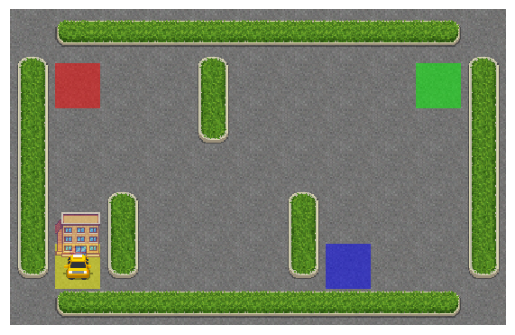

refuerzo recibido :  6
espero 2 segundos y sigo 


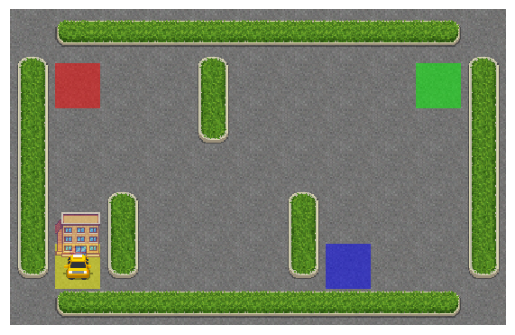

In [3]:
import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import numpy as np
import random
import time


d = Display()
d.start()

env=gym.make("Taxi-v3")

# create a new instance of taxi, and get the initial state
state = env.reset()

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())



state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

# hyperparameters
learning_rate = 0.9
discount_rate = 0.8
epsilon = 1.0
decay_rate= 0.005

# training variables
num_episodes = 1000
max_steps = 99 # per episode


# training
for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        for s in range(max_steps):

            # exploration-exploitation tradeoff
            if random.uniform(0,1) < epsilon:
                # explore
                action = env.action_space.sample()
            else:
                # exploit
                action = np.argmax(qtable[state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            # Q-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * np.max(qtable[new_state,:])-qtable[state,action])

            # Update to our new state
            state = new_state

            # if done, finish episode
            if done == True:
                break

        # Reducimos el valor de epsilon al final de cada episodio
        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

print(f"Training completed over {num_episodes} episodes")
input("Press Enter to watch trained agent...")

# watch trained agent
state = env.reset()
done = False
rewards = 0

for s in range(max_steps):

        #print(f"TRAINED AGENT")
        #print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward

        display.clear_output(wait=True)
        img.set_data(env.render('rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())


        print ("refuerzo recibido : ",rewards)
        print ("espero 2 segundos y sigo ")
        #input ("pulsa para seguir ")
        time.sleep(3)
        state = new_state

        if done == True:
            break

env.close()


Trata de comparar el código con el algoritmo que aparece en los apuntes de teoría, tratando de entender los detalles.

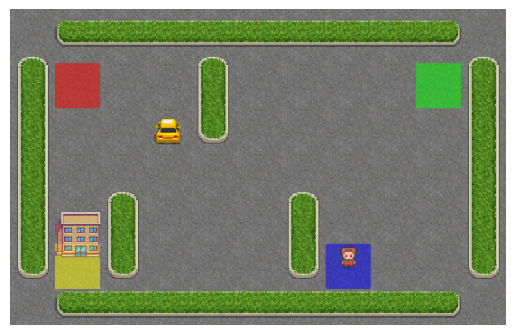

refuerzo recibido :  -35
espero 2 segundos y sigo 


KeyboardInterrupt: 

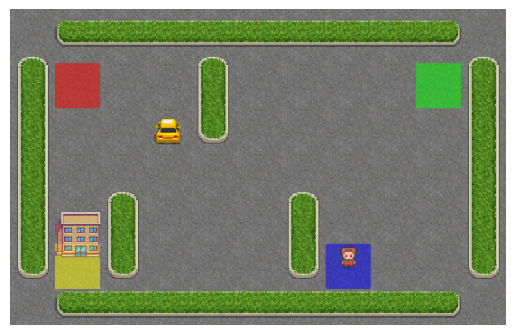

In [14]:
#SARSA

import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import numpy as np
import random
import time


d = Display()
d.start()

env=gym.make("Taxi-v3")

# create a new instance of taxi, and get the initial state
state = env.reset()

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())



state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

# hyperparameters
learning_rate = 0.9
discount_rate = 0.8
epsilon = 1.0
decay_rate= 0.005

# training variables
num_episodes = 1000
max_steps = 99 # per episode


# training
for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        # exploration-exploitation tradeoff
        if random.uniform(0,1) < epsilon:
            # explore
            action = env.action_space.sample()
        else:
            # exploit
            action = np.argmax(qtable[state,:])




        for s in range(max_steps):

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            if random.uniform(0,1) < epsilon:
            # explore
                action_next = env.action_space.sample()
            else:
                # exploit
                action_next = np.argmax(qtable[new_state,:])

            # SARSA-learning algorithm
            qtable[state,action] = qtable[state,action] + learning_rate * (reward + discount_rate * qtable[new_state,action_next]-qtable[state,action])

            # Update to our new state
            state = new_state
            action=action_next

            # if done, finish episode
            if done == True:
                break

        # Reducimos el valor de epsilon al final de cada episodio
        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

print(f"Training completed over {num_episodes} episodes")
input("Press Enter to watch trained agent...")

# watch trained agent
state = env.reset()
done = False
rewards = 0

for s in range(max_steps):

        #print(f"TRAINED AGENT")
        #print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward

        display.clear_output(wait=True)
        img.set_data(env.render('rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())


        print ("refuerzo recibido : ",rewards)
        print ("espero 2 segundos y sigo ")
        #input ("pulsa para seguir ")
        time.sleep(3)
        state = new_state

        if done == True:
            break

env.close()


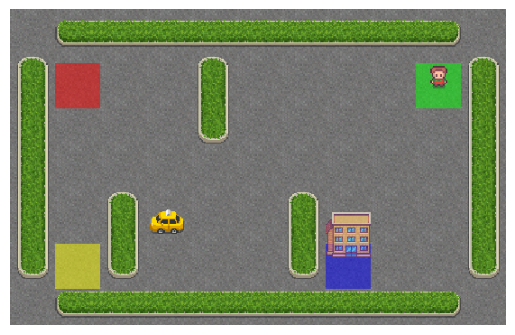

refuerzo recibido :  -7
espero 2 segundos y sigo 


KeyboardInterrupt: 

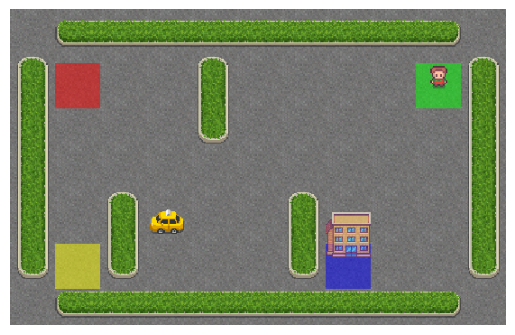

In [3]:
#SARSA(lambda)

import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import numpy as np
import random
import time


d = Display()
d.start()

env=gym.make("Taxi-v3")

# create a new instance of taxi, and get the initial state
state = env.reset()

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())



state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

# hyperparameters
learning_rate = 0.9
discount_rate = 0.8
epsilon = 1.0
decay_rate= 0.005

# training variables
num_episodes = 1000
max_steps = 99 # per episode

acumula=True
dutch=False
remplazar=False

lam=0.9


# training
for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        trazas = np.zeros((state_size, action_size))

        if random.uniform(0,1) < epsilon:
          # explore
              action = env.action_space.sample()
        else:
            # exploit
              action = np.argmax(qtable[new_state,:])


        for s in range(max_steps):

            if random.uniform(0,1) < epsilon:
              # explore
                  action_next = env.action_space.sample()
            else:
                # exploit
                  action_next = np.argmax(qtable[new_state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            delta=reward + discount_rate * qtable[new_state,action_next]-qtable[state,action]

            if acumula:
                  trazas[state, action]=trazas[state, action]+1

            if dutch:
                  trazas[state, action]=(1-learning_rate)*trazas[state, action]+1
            if remplazar:
                  trazas[state, action]=1
            """
            for estado in range(env.observation_space.n):
                  for accion in range(env.action_space.n):
                      qtable[estado, accion]=qtable[estado, accion]+learning_rate*delta*trazas[estado, accion]
                      trazas[estado, accion]=discount_rate*lam*trazas[estado, accion]

            """

            qtable = qtable + learning_rate*delta*trazas
            trazas = discount_rate*lam*trazas
            state=new_state
            action=action_next



            # if done, finish episode
            if done == True:
                break

        # Reducimos el valor de epsilon al final de cada episodio
        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

print(f"Training completed over {num_episodes} episodes")
input("Press Enter to watch trained agent...")

# watch trained agent
state = env.reset()
done = False
rewards = 0

for s in range(max_steps):

        #print(f"TRAINED AGENT")
        #print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward

        display.clear_output(wait=True)
        img.set_data(env.render('rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())


        print ("refuerzo recibido : ",rewards)
        print ("espero 2 segundos y sigo ")
        #input ("pulsa para seguir ")
        time.sleep(3)
        state = new_state

        if done == True:
            break

env.close()


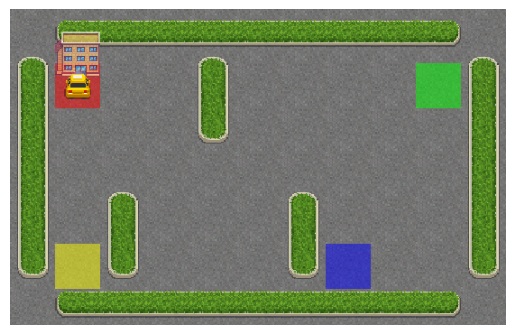

refuerzo recibido :  7
espero 2 segundos y sigo 


In [ ]:
#Q(lambda)

import gym
from IPython import display
from pyvirtualdisplay import Display
import matplotlib.pyplot as plt
import numpy as np
import random
import time


d = Display()
d.start()

env=gym.make("Taxi-v3")

# create a new instance of taxi, and get the initial state
state = env.reset()

img = plt.imshow(env.render('rgb_array'))
display.clear_output(wait=True)
img.set_data(env.render('rgb_array'))
plt.axis('off')
display.display(plt.gcf())



state_size = env.observation_space.n  # total number of states (S)
action_size = env.action_space.n      # total number of actions (A)

# initialize a qtable with 0's for all Q-values
qtable = np.zeros((state_size, action_size))

# hyperparameters
learning_rate = 0.9
discount_rate = 0.8
epsilon = 1.0
decay_rate= 0.005

# training variables
num_episodes = 1000
max_steps = 99 # per episode

acumula=True
dutch=False
remplazar=False

lam=0.9


# training
for episode in range(num_episodes):

        # reset the environment
        state = env.reset()
        done = False

        trazas = np.zeros((state_size, action_size))

        if random.uniform(0,1) < epsilon:
          # explore
              actiont = env.action_space.sample()
        else:
            # exploit
              action = np.argmax(qtable[new_state,:])


        for s in range(max_steps):

            if random.uniform(0,1) < epsilon:
              # explore
                  action_next = env.action_space.sample()
            else:
                # exploit
                  action_next = np.argmax(qtable[new_state,:])

            # take action and observe reward
            new_state, reward, done, info = env.step(action)

            action_max=np.argmax(qtable[new_state, :])

            delta=reward + discount_rate * qtable[new_state,action_max]-qtable[state,action]

            if acumula:
                  trazas[state, action]=trazas[state, action]+1

            if dutch:
                  trazas[state, action]=(1-learning_rate)*trazas[state, action]+1
            if remplazar:
                  trazas[state, action]=1
            """
            for estado in range(env.observation_space.n):
                  for accion in range(env.action_space.n):
                      qtable[estado, accion]=qtable[estado, accion]+learning_rate*delta*trazas[estado, accion]
                      trazas[estado, accion]=discount_rate*lam*trazas[estado, accion]

            """
            qtable = qtable + learning_rate*delta*trazas

            if action_next==action_max:
                  trazas=discount_rate*lam*trazas
            else:
                  trazas = np.zeros((state_size, action_size))

            state=new_state
            action=action_next



            # if done, finish episode
            if done == True:
                break

        # Reducimos el valor de epsilon al final de cada episodio
        # Decrease epsilon
        epsilon = np.exp(-decay_rate*episode)

print(f"Training completed over {num_episodes} episodes")
input("Press Enter to watch trained agent...")

# watch trained agent
state = env.reset()
done = False
rewards = 0

for s in range(max_steps):

        #print(f"TRAINED AGENT")
        #print("Step {}".format(s+1))

        action = np.argmax(qtable[state,:])
        new_state, reward, done, info = env.step(action)
        rewards += reward

        display.clear_output(wait=True)
        img.set_data(env.render('rgb_array'))
        plt.axis('off')
        display.display(plt.gcf())


        print ("refuerzo recibido : ",rewards)
        print ("espero 2 segundos y sigo ")
        #input ("pulsa para seguir ")
        time.sleep(3)
        state = new_state

        if done == True:
            break

env.close()
